In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


## Resolução numérica de sistemas lineares - Métodos diretos

Bibliografia:

* Quarteroni-Saleri, Capítulo 5.
* Livro Mathematics for Machine Learning, Cap. 2.   https://mml-book.github.io/book/mml-book.pdf
* Slides do Prof. Afonso Paiva Neto.
* Canal de YouTube do Prof. Afonso Paiva Neto.

### Revisão de álgebra linear

**Definição:** Uma função $f:X \to Y$ é **linear** se

$$
      f(\alpha u + \beta v)=\alpha\,f(u)+\beta f(v),\quad \forall u,v\in X,~\forall \alpha,\beta \in \mathbb{R}.
$$

**Exemplos:** $f(x)=0$ é linear. $f(x)=2x$ é linear. $f(x,y)=3x+4y$ é linear. $f(x)=5x+1$ **não é** linear, mas é **afim**.

As funções lineares são as que satisfazem **aditividade** ($f(u+v)=f(u)+f(v)$) e **homogeneidade** ($f(\alpha u)=\alpha\,f(u)$)


**Teorema:** Se $f:\mathbb{R}^m \to \mathbb{R}^n$ é linear, então existe uma matriz $A$ de $n$ linhas e $m$ colunas tal que
$$
      f(x)=Ax,\qquad \forall\,x\,\in\,\mathbb{R}^m.
$$

A coluna $j=1,\ldots,m$ de $A$ é dada por
    \begin{equation}
      \mbox{col}_j(A)=f(e_j),\quad e_j=(0,0,\ldots,0,1,0,\ldots)^T,
    \end{equation}
com o 1 na posição $j$.

**Exercício:** Seja $y=f(x)$ uma função que toma $x$ (vetor de dimensão $m$) e produz o vetor $y$ (de dimensão $n$). Dessa função temos apenas o código. Seja $X\subset \mathbb{R}^m$ o domínio de $f$ (o conjunto de vetores nos quais será usada a função $f$), por exemplo, $X = \{ x\in \mathbb{R}^m\,|\, 0 \leq x_i \leq L, ~i=1,\ldots,m \}$. Sugerir um "teste de linearidade", que verifique se $f$ é ou não linear em $X$.

O propósito desse exercício é pensar a linearidade como uma propriedade verificável das funções, sem depender da expressão algébrica.

In [4]:
import numpy as np

def funcao(x):
  y=np.zeros(2)
  y[0]=float(x.sum())
  y[1]=float(x.mean())
  return y

def funcao2(x):
  y=np.zeros(3)
  y[0]=float(x.sum())
  y[1]=float(x.mean())
  y[2]=np.tanh(0.01*x[0])
  return y

def verifica_linearidade(f, L, dim_in, dim_out, num_testes=10):
    """
    Testa se uma função f: R^m -> R^n é linear, verificando aditividade e homogeneidade.

    Parâmetros:
        f: função a ser testada
        L: limite superior do domínio de f
        dim_in: dimensão do espaço de entrada (m)
        dim_out: dimensão do espaço de saída (n)
        num_testes: número de testes aleatórios a serem realizados

    Retorna:
        True se f passar nos testes de linearidade, False caso contrário.

    """
    for _ in range(num_testes):
        u = np.random.rand(dim_in)*L #vetor com coordenadas entre 0 e L
        v = np.random.rand(dim_in)*L #vetor com coordenadas entre 0 e L
        c = np.random.rand()  # escalar aleatório entre 0 e 1

        # Teste de aditividade
        if max(u+v) < L:
          if not np.allclose(f(u + v), f(u) + f(v)):
            print("Falha na aditividade para u =", u, "e v =", v)
            return False

        # Teste de homogeneidade
        if not np.allclose(f(c * u), c * f(u)):
            print("Falha na homogeneidade para u =", u, "e c =", c)
            return False

    return True

# Exemplo de função linear f(x) = Ax, onde A é uma matriz fixa
A = np.array([[2, 0], [0, 3]])  # Matriz 2x2
f_linear = lambda x: A @ x

# Exemplo de função não linear f(x) = Ax + b, onde b ≠ 0
b = np.array([1, -1])
f_nao_linear = lambda x: A @ x + b

# Testando as funções
print("f_linear é linear?", verifica_linearidade(f_linear, 10, 2, 2))
print("f_nao_linear é linear?", verifica_linearidade(f_nao_linear, 10, 2, 2))
print("funcao é linear?", verifica_linearidade(funcao, 10, 20, 2,20000))
print("funcao2 é linear?", verifica_linearidade(funcao2, 10, 2, 3))




f_linear é linear? True
Falha na homogeneidade para u = [7.2966763  5.93145606] e c = 0.6984697708376257
f_nao_linear é linear? False
funcao é linear? True
Falha na aditividade para u = [8.4284255  6.05447346] e v = [0.80471072 1.4658072 ]
funcao2 é linear? False


**Exercício:** Seja $B$ um array de $\mathbb{R}^{r\times s}$ contendo a intensidade dos pixels de uma imagem de $r\times s$ pixels. Considere a operação de "suavização" da imagem, na qual uma imagem suavizada $C$ é construida a partir de $B$. Especificamente, cada pixel de $C$ é calculado como a média entre o pixel correspondente de $B$ e todos seus vizinhos.

* A operação de suavização é linear?
* Qual é a matriz que se corresponde com essa operação?

Ajuda: A matriz que procuramos não deveria ter dimensão $(r\times s)\times(r\times s)$?



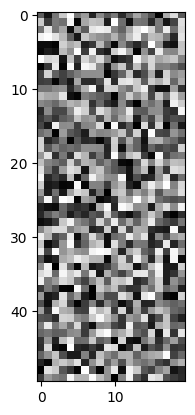

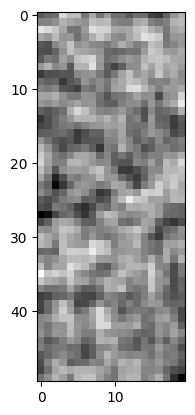

In [5]:
import numpy as np
import matplotlib.pyplot as plt

B=np.random.rand(50,20)
plt.imshow(B,cmap='gray')
plt.show()

def suaviza(B):

  C=np.zeros(B.shape)
  r=B.shape[0]
  s=B.shape[1]
  for i in range(1,r-1):
    for j in range(1,s-1):
      C[i,j]=(B[i-1,j-1]+B[i-1,j]+B[i-1,j+1]+B[i,j-1]+B[i,j]+B[i,j+1]+B[i+1,j-1]+B[i+1,j]+B[i+1,j+1])/9

  #plt.imshow(C,cmap='gray')
  #plt.show()

  for i in range(1,r-1):
    C[i,0]=(B[i-1,0]+B[i-1,1]+B[i,0]+B[i,1]+B[i+1,0]+B[i+1,1])/6
    C[i,s-1]=(B[i-1,s-1]+B[i-1,s-2]+B[i,s-1]+B[i,s-2]+B[i+1,s-1]+B[i+1,s-2])/6

  for j in range(1,s-1):
    C[0,j]=(B[0,j-1]+B[0,j]+B[0,j+1]+B[1,j-1]+B[1,j]+B[1,j+1])/6
    C[r-1,j]=(B[r-1,j-1]+B[r-1,j]+B[r-1,j+1]+B[r-2,j-1]+B[r-2,j]+B[r-2,j+1])/6

  C[0,0]=(B[0,0]+B[0,1]+B[1,0]+B[1,1])/4
  C[0,s-1]=(B[0,s-1]+B[0,s-2]+B[1,s-1]+B[1,s-2])/4
  C[r-1,0]=(B[r-1,0]+B[r-1,1]+B[r-2,0]+B[r-2,1])/4
  C[r-1,s-1]=(B[r-1,s-1]+B[r-1,s-2]+B[r-2,s-1]+B[r-2,s-2])/4

  return C

C=suaviza(B)

plt.imshow(C,cmap='gray')
plt.show()



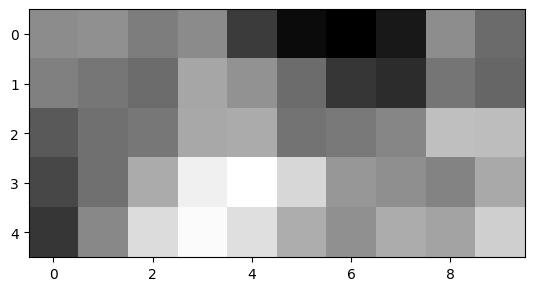

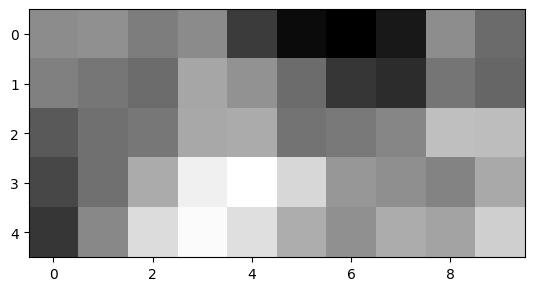

2.220446049250313e-16


In [6]:
A=np.random.rand(5,10)
B=np.random.rand(5,10)

C=suaviza(A+B)
D=suaviza(A)+suaviza(B)

plt.imshow(C,cmap='gray')
plt.show()
plt.imshow(D,cmap='gray')
plt.show()
print(np.max(np.abs(C-D)))


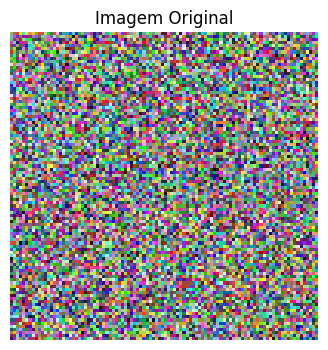

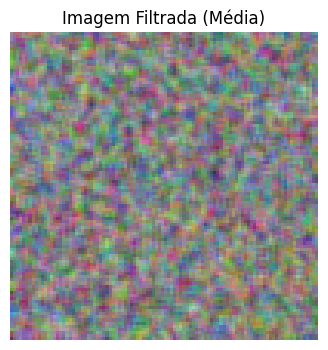

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Definindo as dimensões da imagem
largura, altura = 100, 100  # Você pode alterar esses valores conforme desejar

# Gerando uma imagem RGB aleatória com pixels definidos
# Cada pixel terá valores entre 0 e 255 para R, G e B
img_data = np.random.randint(0, 256, (altura, largura, 3), dtype=np.uint8)

# Convertendo o array NumPy para uma imagem PIL
imagem = Image.fromarray(img_data)

# Exibindo a imagem original
plt.figure(figsize=(4,4))
plt.imshow(imagem)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

# Criando uma nova imagem para armazenar o resultado filtrado
nova_imagem = Image.new("RGB", (largura, altura))

# Aplicando o filtro de média (blur) para cada pixel da imagem
for x in range(largura):
    for y in range(altura):
        soma_r = 0
        soma_g = 0
        soma_b = 0
        contagem = 0

        # Percorre a vizinhança 3x3 ao redor do pixel (x, y)
        for dx in range(-1,2):
            for dy in range(-1, 2):
                nx = x + dx
                ny = y + dy

                # Verifica se as coordenadas (nx, ny) estão dentro dos limites da imagem
                if 0 <= nx < largura and 0 <= ny < altura:
                    pixel_valor = imagem.getpixel((nx, ny))
                    soma_r += pixel_valor[0]
                    soma_g += pixel_valor[1]
                    soma_b += pixel_valor[2]
                    contagem += 1

        # Calcula a média dos canais para a vizinhança
        media_r = soma_r // contagem
        media_g = soma_g // contagem
        media_b = soma_b // contagem

        # Define o pixel (x, y) da nova imagem com a cor média calculada
        nova_imagem.putpixel((x, y), (media_r, media_g, media_b))

# Exibindo a imagem filtrada
plt.figure(figsize=(4,4))
plt.imshow(nova_imagem)
plt.title("Imagem Filtrada (Média)")
plt.axis('off')
plt.show()


**Produto Matriz-Vetor:** Multiplicar $A$ por $x$ equivale a combinar linearmente as colunas de $A$ com os coeficientes dados pelos elementos de $x$, i.e.,
$$
Ax=\sum_{j=1}^m x_j \mbox{col}_j(A)
$$

A componente $i$ de $Ax$, i.e., $(Ax)_i$, é dado por
$$
(Ax)_i = \sum_{j=1}^m x_j \left ( \mbox{col}_j(A) \right )_i = \sum_{j=1}^m x_j A_{ij}
$$
O segundo índice de $A$ é "contraído" com o único índice de $x$.

**Interpretação com Matrizes de Dados:** Em estatística é costume chamar a matriz de dados de $X$.

* Cada uma das $n$ linhas de $X$ corresponde a um elemento amostral, que pode ser uma pessoa, uma transação comercial, uma medição, etc.
* Cada uma das $m$ colunas de $X$ corresponde a uma das variáveis que são coletadas para cada elemento (features). Por exemplo, em transações online podem ser o tempo, os dados do comprador, o valor do bem comprado, o número de parcelas solicitado, etc.
* Assim, cada linha de $X$ é um ponto $x\in\mathbb{R}^m$ com os valores das variáveis para esse elemento.
* Em aprendizado supervisionado, temos uma resposta $y\in \mathbb{R}$, com um valor por elemento amostral.

Assim, o modelo linear com ruído aditivo $\varepsilon$ para o sistema é
$$
y = x^T \beta + \varepsilon~=~\beta_1 x_1 + \beta_2 x_2 + \ldots +\beta_m x_m +\varepsilon
$$
Isto acontece para cada linha de $X$, levando à equação matricial
$$
X\,\beta + \varepsilon = y~.
$$
Em ausência de ruído, o vetor resposta $y$ deve satisfazer o sistema linear
$$
X\,\beta = y
$$
onde **a incógnita é o vetor de coeficientes $\beta$**.



**Produto Vetor linha-Matriz:** O produto $y^T A$, onde $y\in Y=\mathbb{R}^n$, dá por resultado um vetor linha $y^TA\in\mathbb{R}^m$ que é uma combinação linear das linhas de $A$, com coeficientes dados por $y$.

In [7]:
import numpy as np
A=np.random.randint(0,10,(3,5))
print(A)
x=np.random.randint(0,10,5)
print(x)
print(A@x)
print(np.dot(A,x))
print(A.dot(x))
##print(np.dot(x,A)) ## essa dá erro
y=np.random.randint(0,10,3)
print(y)
print(y.T@A)
print(np.dot(y.T,A))
print(np.dot(y,A)) ## !!


[[9 5 6 9 9]
 [1 5 2 8 5]
 [8 2 3 4 5]]
[7 3 6 4 0]
[150  66  96]
[150  66  96]
[150  66  96]
[6 5 9]
[131  73  73 130 124]
[131  73  73 130 124]
[131  73  73 130 124]


Verifiquemos a obtenção da coluna $j$ fazendo $Ae_j$:

In [8]:
import numpy as np
A=np.random.randint(0,10,(3,5))
print(A)
print(A[0:3,4])
j=np.random.randint(0,5)
print(j)
ej=np.zeros(5)
ej[j]=1
print(ej)
print(A@ej)

[[7 8 8 2 7]
 [7 5 9 2 8]
 [2 3 2 9 2]]
[7 8 2]
2
[0. 0. 1. 0. 0.]
[8. 9. 2.]


**Imagem ou espaço coluna de uma matriz:** ("range", em inglês) $\mbox{Im}(A)$, ou $\mbox{Col}(A)$, é o conjunto (espaço vetorial) de todos os vetores de $Y=\mathbb{R}^n$ que podem ser obtidos como combinações lineares das colunas de $A$.

$~$

$$
\mbox{Im}(A) = \quad
\left \{
  w\in \mathbb{R}^n ~|~\exists x\in\mathbb{R}^m~\mbox{ tal que } w = \sum_j x_j \mbox{col}_j(A)
  \right \}
  \quad = \quad
\left \{
  w\in \mathbb{R}^n ~|~\exists x\in\mathbb{R}^m~\mbox{ tal que } w = A x
  \right \}
$$

**Posto de uma matriz:** A dimensão de $\mbox{Im}(A)$ é chamada de **posto** ("rank") da matriz, $\mbox{posto}(A)$. É possível provar que
$$
\mbox{posto}(A) \leq \min \{ m, n \}~.
$$

$~$

A matriz é dita **de posto completo** se $\mbox{posto}(A)=\min \{m,n\}$.

**Núcleo ou espaço nulo de uma matriz:** ("Kernel" ou "null space")

$$
\mbox{Nu}(A) = \left \{
  x\in X ~|~Ax = 0
  \right \}
  $$
  onde $0 \in \mathbb{R}^n$. O espaço nulo de uma matriz é espaço vetorial.

**Teorema do Núcleo e da Imagem:** (ou Teorema da Dimensão)

$$
\mbox{dim}\left ( \mbox{Nu}(A) \right )
+\mbox{dim}\left ( \mbox{Im}(A) \right ) = m
$$

###Sistemas lineares de equações

Um **sistema linear de equações** é uma equação da forma
$$
f(x) = b
$$
onde $f:\mathbb{R}^m\to \mathbb{R}^n$ é linear e $b\in\mathbb{R}^n$.

Pelo anterior, o sistema linear pode também ser escrito como
$$
Ax=b
$$
ou, também,
$$
\sum_{j=1}^m x_j \mbox{col}_j(A) = b.
$$
O problema não é senão determinar qual combinação das colunas de $A$ tem por resultado o vetor $b$.

**Teorema:**

Um sistema linear **tem solução** se e só se $b$ pertence a Im$(f)=$Col$(A)$, o espaço de combinações lineares de colunas de $A$.

Existindo solução, **ela é unica** se e só se $\left [ f(x)=0 \Rightarrow x=0\right ]$, o que acontece se e só se as colunas de $A$ são **linearmente independentes**, ou, equivalentemente, se $\mbox{Nu}(A)=0$.

**Corolário:** Para um sistema linear ter **solução única para todo lado direito** $b$ ele deve ser **quadrado** ($n=m$) e ter $\mbox{det}\, A \neq 0$.

Para uma matriz $A$ quadrada, notavelmente, as colunas são l.i. se e só se as linhas são l.i.
    

###Solução de sistemas lineares especiais

**Matriz diagonal:**

In [9]:
import numpy as np

A = np.arange(9).reshape((3,3))
print('A=')
print(A)
print('diag(A)=',np.diag(A))
print('diag(A,1)=',np.diag(A,1))
print('diag(A,-1)=',np.diag(A,-1))
B = np.diag(np.diag(A))
print('B=')
print(B)
B=B+10*np.eye(3)
print(B)

A=
[[0 1 2]
 [3 4 5]
 [6 7 8]]
diag(A)= [0 4 8]
diag(A,1)= [1 5]
diag(A,-1)= [3 7]
B=
[[0 0 0]
 [0 4 0]
 [0 0 8]]
[[10.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0. 18.]]


In [10]:
#Resolvendo Bx=b
b=np.arange(3).reshape((3,))
print('b=')
print(b)
x=np.linalg.solve(B,b)
print('x=')
print(x)
b=np.arange(3).reshape((3,1))
print('b=')
print(b)
x=np.linalg.solve(B,b)
print('x=')
print(x)

b=
[0 1 2]
x=
[0.         0.07142857 0.11111111]
b=
[[0]
 [1]
 [2]]
x=
[[0.        ]
 [0.07142857]
 [0.11111111]]


In [11]:
#Versão mais explícita
b=np.arange(3).reshape((3,))
D=np.diag(B).reshape((3,))
x=b/D
print(x)
b=np.arange(3).reshape((3,1))
D=np.diag(B).reshape((3,1))
x=b/D
print(x)

[0.         0.07142857 0.11111111]
[[0.        ]
 [0.07142857]
 [0.11111111]]


In [12]:
#Step by step
for j in np.arange(3):
  x[j]=b[j]/D[j]
print(x)

[[0.        ]
 [0.07142857]
 [0.11111111]]


**Matriz triangular superior:** Essa matriz é resolvida por substituição regressiva.

$$
x_i = \frac{1}{A_{ii}}\left ( b_i - A_{i,i+1} x_{i+1} - A_{i,i+2} x_{i+2} - \ldots \right )
$$



In [13]:
#função que resolve uma matriz triangular superior
def triangular_superior(A,b):
  #Notar que a parte triangular inferior não precisa estar em zero
  #(Pode ser usada para armazenar o fator L)
  n=len(b)
  z=np.zeros(n)
  z[n-1]=b[n-1]/A[n-1,n-1]
  for i in np.arange(n-2,-1,-1):
    #print('i=',i,'z=',z)
    z[i]=(b[i]-np.dot(A[i,i+1:n],z[i+1:n]))/A[i,i]
  return z

A=np.random.randint(1,10,(3,3))
print('A=')
print(A)
B=np.triu(A)
print('B=')
print(B)
b=np.dot(B,np.array([1, 1, 1]))
print('b=')
print(b)
x=np.linalg.solve(B,b)
print('x=')
print(x)
x=triangular_superior(B,b)
print('x=')
print(x)
x=triangular_superior(A,b)
print(x)


A=
[[6 7 6]
 [7 4 4]
 [3 3 9]]
B=
[[6 7 6]
 [0 4 4]
 [0 0 9]]
b=
[19  8  9]
x=
[1. 1. 1.]
x=
[1. 1. 1.]
[1. 1. 1.]


**Matriz triangular inferior:** Essa matriz é resolvida por substituição progressiva.

In [14]:
#função que resolve uma matriz triangular inferior
#assumimos que a diagonal é 1, apenas usamos os elementos embaixo da diagonal
def triangular_inferior(A,b):
  #Notar que a parte triangular superior não precisa estar em zero.
  #(Pode ser usada para armazenar o fator U)
  n=len(b)
  z=np.zeros(n)
  z[0]=b[0]
  for i in np.arange(1,n):
    #print('i=',i,'z=',z)
    z[i]=(b[i]-np.dot(A[i,:i],z[:i]))
  return z

#A=np.random.randint(1,10,(3,3))
rng=np.random.default_rng(7858477733)
A=rng.integers(low=1,high=10,size=(3,3))
print('A=')
print(A)
B=np.tril(A,-1)
B=B+np.eye(3)
print('B=')
print(B)
b=np.dot(B,np.array([1, 1, 1]))
print('b=')
print(b)
x=np.linalg.solve(B,b)
print('x=')
print(x)
x=triangular_inferior(B,b)
print('x=')
print(x)
x=triangular_inferior(A,b)
print(x)


A=
[[2 3 6]
 [5 7 8]
 [9 5 3]]
B=
[[1. 0. 0.]
 [5. 1. 0.]
 [9. 5. 1.]]
b=
[ 1.  6. 15.]
x=
[1. 1. 1.]
x=
[1. 1. 1.]
[1. 1. 1.]


**Matriz ortogonal:** Lembrar que uma matriz ortogonal é aquela matriz $n \times n$ tal que
$$
A^T A = A A^T = \mbox{Id}_n
$$

Isto implica que

(a) det$(A)=\pm 1$,

(b) $A^{-1}=A^T$,

(c) as colunas são base ortonormal de $\mathbb{R}^n$,

(d) as linhas são base ortonormal de $\mathbb{R}^n$,

(e) a solução de $Ax=b$ pode ser obtida multiplicando $b$ por $A^T$, i.e.,

$$
x = A^T b
$$


Informação relevante: Toda matriz $A$ pode ser fatorada da forma
$$
A = Q\,R
$$
onde $Q$ é ortogonal e $R$ é triangular superior.

O seguinte código gera uma matriz ortogonal aleatória:

In [15]:
def random_ortogonal():
  rng=np.random.default_rng(7858477733)
  A=rng.standard_normal(size=(3,3))
  #A=np.random.randn(3,3)
  Q, R=np.linalg.qr(A)
  return Q

A=random_ortogonal()
print(A)
print(A.T@A)
print(np.allclose(A@A.T,np.eye(3,3)))

[[-0.80454939 -0.54803823  0.22881076]
 [ 0.56594201 -0.82429637  0.0156565 ]
 [ 0.18002752  0.14209005  0.97334501]]
[[ 1.00000000e+00  3.07196096e-17 -2.27204496e-17]
 [ 3.07196096e-17  1.00000000e+00 -1.84888859e-17]
 [-2.27204496e-17 -1.84888859e-17  1.00000000e+00]]
True


In [16]:
b=A@np.array([1, 1, 1])
print(b)
x=np.linalg.solve(A,b)
print(x)
x=A.T@b
print(x)

[-1.12377686 -0.24269786  1.29546258]
[1. 1. 1.]
[1. 1. 1.]


###Matrizes de permutação

**Matriz de permutação:** Matriz que tem exatamente um elemento 1 em cada linha e cada coluna, sendo o resto 0.

Seja $\pi=(2,1,3,0)$ uma permutação, e seja $v=(a,b,c,d)$ um vetor (coluna). A permutação inversa é $\pi^{-1}=(3,1,0,2)$.

O vetor (coluna) permutado
$$
w=P_{\pi}\,v
$$
é definido como sendo
$$
w[\pi(k)]=v[k],\quad k=1,\ldots,n
$$
ou, equivalentemente,
$$
w[k]=v[\pi^{-1}(k)],\quad k=1,\ldots,n.
$$
Nesse caso particular o resultado é
$$
w=(d,b,a,c).
$$
Notar que a permutação é operação linear, representável por uma **matriz de permutação**. Qual?
$$
P_{\pi} = \left ( \begin{array}{ccc}
0 & 0 & 0 & 1 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0
\end{array}
  \right )
$$
A coluna $j$ da matriz $P_{\pi}$ contém 0 nos elementos das linhas diferentes de $\pi(j)$, e 1 na linha $\pi(j)$. Isto é,
$$
P_{\pi}[i,j]=\delta_{i,\pi(j)}=\left \{
  \begin{array}{ll}
  1 & \mbox{ se } i=\pi(j) \\
  0 & \mbox{ se não}.
  \end{array}
  \right.~.
$$
As matrizes de permutação tem determinante $\mbox{det}(P_{\pi})=\pm 1$. São inversíveis. A inversa é
$$
P_{\pi}^{-1}=P_{\pi}^T~.
$$
As matrizes de permutação são ortogonais!
Assim, se $A=P_{\pi}$, resolvemos o sistema $Ax=b$ fazendo
$$
x = A^T b~.
$$
Primeiramente, vejamos como permutar vetores.

In [17]:
import numpy as np
rng=np.random.default_rng(7858477733)
n=5
vector=rng.integers(low=10,high=99,size=(n,))
#Geração de uma permutação aleatória de [0,1,...,n-1]
perm=np.arange(n)
rng.shuffle(perm)
print('perm=',perm)
print(perm.dtype)
#Outra maneira de gerar uma permutação
perm2=np.random.permutation(n)
print('perm2=',perm2)
print(perm2.dtype)
#Inverse permutation
inv_perm=np.zeros(n).astype(int)
inv_perm[perm]=np.arange(n)
print('inv_perm=',inv_perm)
print('vector=',vector)
#Permuted vector
permuted_vector=np.zeros(n).astype(int)
permuted_vector[perm]=vector
print('permuted vector=',permuted_vector)
unpermuted_vector=np.zeros(n).astype(int)
unpermuted_vector[inv_perm]=permuted_vector
print('unpermuted vector=',unpermuted_vector)


perm= [0 2 4 3 1]
int64
perm2= [1 3 2 0 4]
int64
inv_perm= [0 4 1 3 2]
vector= [25 37 60 55 74]
permuted vector= [25 74 37 55 60]
unpermuted vector= [25 37 60 55 74]


Agora, vejamos como realizar as mesmas operações com matrizes.

In [18]:
Pperm=np.zeros((n,n)).astype(int)
Pperm[perm,np.arange(n)]=1
print('Pperm=')
print(Pperm)
Pinvperm=np.zeros((n,n)).astype(int)
Pinvperm[inv_perm,np.arange(n)]=1
print('Pinvperm=')
print(Pinvperm)
print(Pinvperm == Pperm.T)
print(np.dot(Pperm,Pinvperm))
permuted_vector2=np.dot(Pperm,vector)
print('permuted vector2=',permuted_vector2)
unpermuted_vector2=np.dot(Pinvperm,permuted_vector2)
print('unpermuted vector2=',unpermuted_vector2)
print(unpermuted_vector2==vector)

Pperm=
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]
Pinvperm=
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
permuted vector2= [25 74 37 55 60]
unpermuted vector2= [25 37 60 55 74]
[ True  True  True  True  True]


###Eliminação de Gauss (Escalonamento)

O conhecido **algoritmo de escalonamento** aproveita que as seguintes operações não mudam a solução:

*   Multiplicar uma equação por um escalar;
*   Substituir uma equação pela soma dela mesma mais um múltiplo de qualquer outra equação;
*   Trocar a ordem das equações.

Na sua versão mais simples (sem pivotamento), pode ser programado da seguinte maneira:



In [19]:
import numpy as np
def gauss(A, b):
    n = b.shape[0]
    x = np.zeros_like(b)
    for k in range(n - 1):
        if A[k, k] == 0.0:
            raise ZeroDivisionError("Zero pivot")
        for i in range(k + 1, n):
            A[i,k] = A[i,k] / A[k,k]
            b[i] = b[i] - A[i,k] * b[k]
            for j in range(k + 1, n):
              A[i, j] = A[i,j] - A[i,k]*A[k,j]

    x[-1] = b[-1] / A[-1, -1]

    for i in range(n - 2, -1, -1):
        x[i] = (b[i] - A[i, (i + 1) : n] @ x[(i + 1) : n]) / A[i, i]

    return x, A, b

A=np.random.randn(3,3)
b=np.dot(A,np.array([1, 1, 1]))
print(A)
print(b)
x, Atri, btri = gauss(A.copy(), b.copy())
print(x)
print(Atri)
print(btri)
print(A)

[[ 2.38731922 -0.2061351   2.38870342]
 [-1.21693803 -0.05478392  0.23793818]
 [-0.09603232 -0.80832723  0.67288732]]
[ 4.56988754 -1.03378377 -0.23147223]
[1. 1. 1.]
[[ 2.38731922 -0.2061351   2.38870342]
 [-0.50975086 -0.15986146  1.45558181]
 [-0.04022601  5.10829319 -6.66656334]]
[ 4.56988754  1.29572035 -6.66656334]
[[ 2.38731922 -0.2061351   2.38870342]
 [-1.21693803 -0.05478392  0.23793818]
 [-0.09603232 -0.80832723  0.67288732]]


**Teorema:** Se a matriz $A$ é não singular (det$(A)\neq 0$), a eliminação de Gauss (com pivotamento) determina a solução única do sistema linear.

###A fatoração LU

Um ponto crucial do algoritmo de eliminação de Gauss é que ele determina uma fatoração de $A$, especificamente,

$$
A = L\,U
$$

onde $L$ é triangular inferior (com 1 na diagonal) e $U$ é triangular superior.

$~$

Uma vez aplicado o algoritmo, a matriz resultante tem $U$ como sua parte triangular superior e $L$ como sua parte triangular inferior (sem a diagonal, que é 1).

Verifiquemos:

In [20]:
L=np.tril(Atri,-1)+np.eye(3)
U=np.triu(Atri)
print(L)
print(U)
print(L@U-A)

[[ 1.          0.          0.        ]
 [-0.50975086  1.          0.        ]
 [-0.04022601  5.10829319  1.        ]]
[[ 2.38731922 -0.2061351   2.38870342]
 [ 0.         -0.15986146  1.45558181]
 [ 0.          0.         -6.66656334]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.93889390e-18  1.11022302e-16]
 [ 0.00000000e+00  1.11022302e-16  4.44089210e-16]]


Vamos definir uma função que simplesmente calcula a fatoração, sem resolver o sistema.

In [21]:
import numpy as np
def fatorLU(A):
  n,m = A.shape
  if n != m:
    raise ValueError("A deve ser quadrada")
  for k in range(n - 1):
    if A[k, k] == 0.0:
      raise ZeroDivisionError("Zero pivot")
    for i in range(k + 1, n):
      A[i,k] = A[i,k] / A[k,k]
      for j in range(k + 1, n):
        A[i, j] = A[i,j] - A[i,k]*A[k,j]
  L=np.tril(A,-1)+np.eye(n)
  U=np.triu(A)
  return L, U

rng=np.random.default_rng()
n=5
A=rng.standard_normal((n,n))
print(A)
L, U = fatorLU(A.copy())
print(L)
print(U)
print(L@U-A)



[[-1.15987508 -1.69054898  0.56144285 -0.62476974 -0.41077385]
 [ 1.03944281  0.77800981  1.57077008 -0.88598868 -0.46471954]
 [-1.0110812   1.10032715 -0.18015244 -1.68426202 -1.52944993]
 [-0.53787846 -0.75075428 -0.2528802  -0.71520899  0.49072652]
 [ 0.26205169  1.75282127  0.28980674  0.83052988 -0.05232934]]
[[ 1.          0.          0.          0.          0.        ]
 [-0.89616789  1.          0.          0.          0.        ]
 [ 0.8717156  -3.49251615  1.          0.          0.        ]
 [ 0.46373827 -0.04507152 -0.06385648  1.          0.        ]
 [-0.22593096 -1.86005823  0.65021432 -2.2851712   1.        ]]
[[-1.15987508 -1.69054898  0.56144285 -0.62476974 -0.41077385]
 [ 0.         -0.73700592  2.07391714 -1.44588726 -0.83284187]
 [ 0.          0.          6.57361816 -6.1894251  -4.08008564]
 [ 0.          0.          0.         -0.88588261  0.38314071]
 [ 0.          0.          0.          0.          1.834202  ]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0

###O método de fatorar-resolver

Se se dispõe de uma fatoração $A=BC$, onde $B$ e $C$ são matrizes fáceis de resolver, o cálculo da solução $x$ tal que $Ax=b$ se simplifica:


*   Passo 1: Calcular $z$ resolvendo $Bz=b$.
*   Passo 2: Calcular $x$ tal que $Cx=z$.

Assim, $b=Bz=BCx=Ax$.

Acima, já temos programado uma função que calcula a fatoração $A=LU$, outra que resolve matrizes triangulares inferiores como $L$, outra que resolve matrizes triangulares superiores como $U$. Combinemos elas para resolver o sistema.



In [22]:
import numpy as np
rng=np.random.default_rng()
n=5
A=rng.standard_normal((n,n))
b=np.dot(A,np.array(n*[1]))
print(A)
print(b)
L, U = fatorLU(A.copy())
z=triangular_inferior(L,b)
x=triangular_superior(U,z)
print(x)

[[ 0.74452319 -0.38186245  1.21088761  1.3547935   0.82526808]
 [ 0.76835596 -0.36494453  1.02394068  1.12550734 -0.14667707]
 [ 0.87411577 -0.13479234  2.58213183 -1.15357403  0.52710437]
 [-0.07494349  1.10171718 -0.48522067 -1.08922147 -0.94853632]
 [-0.62776918 -0.60078949 -1.00013375 -0.72837655  1.07274834]]
[ 3.75360993  2.40618238  2.6949856  -1.49620477 -1.88432064]
[1. 1. 1. 1. 1.]


O custo computacional (número de operações) está concentrado no cálculo dos fatores triangulares, que só dependem da matriz do sistema. Se se deseja resolver o sistema muitas vezes com vários lados direitos, a fatoração pode ser feita apenas uma vez.

Quando a matriz $A$ é simétrica e definida positiva existe a fatoração de Choleski, que é da forma
$$
A = LL^T~,
$$
com $L$ triangular inferior.

Essa fatoração é muito utilizada em cálculo numérico pela sua eficiência (apenas uma matriz triangular a armazenar!).

Ela é também muito importante em ciência de dados, onde a matriz de covariância de uma distribuição Gaussiana multivariada é simétrica e definida positiva.

###Custos da resolução


* O custo (em operações de ponto flutuante) de resolver um sistema diagonal é $\sim n$ (uma multiplicação por linha).
* Se o sistema é triangular: $\sim n^2$.
* Se o sistema é ortogonal: $\sim 2n^2$ (custo do produto matriz-vetor).
* O custo da fatoração LU é: $\sim \frac23 n^3$.
* Assim, o custo de resolver uma matriz com $d$ lados direitos é: $\sim \frac23 n^3 + d\,n^2$.

$~$

Esses custos são para matrizes "cheias", se elas são esparsas o custo pode ser muito menor. Por exemplo, para matrizes de elementos finitos é frequente observar custos $\sim n^{2.3}$.

###Resolvedores em Numpy e Scipy

**numpy.linalg.solve** / **scipy.linalg.solve**



In [23]:
import numpy as np
import scipy as sp

A = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])

x = np.linalg.solve(A, b)
x2 = sp.linalg.solve(A, b)
print(x)
print(x2)

#Check that the solution is correct:

print(np.allclose(np.dot(A, x), b))
print(np.allclose(np.dot(A, x2), b))


ModuleNotFoundError: No module named 'scipy'

**scipy.linalg.lu**

Calcula decomposição $A=PLU$, onde $P$ é uma permutação obtida com pivotamento parcial, $L$ é triangular inferior unitária, $U$ es triangular superior.

In [ ]:
P,L,U = sp.linalg.lu(A)
B=np.dot(P,L)
B=np.dot(B,U)
print(np.allclose(B,A))

True


**scipy.linalg.solve_triangular**

$PLUx=b \Rightarrow Py=b,\quad Lz=y,  \quad Ux=z$

In [ ]:
y=np.dot(P.T,b)
z=sp.linalg.solve_triangular(L,y,lower=True)
x=sp.linalg.solve_triangular(U,z,lower=False)
print(x)

[-1.  1.]


###Exercício

Comparar o tempo de resolver o sistema com a função `gauss` e com a fatoração LU, para vários valores de $n$ e considerando que devem ser resolvidos muitos lados direitos.

In [ ]:
import numpy as np
import time
rng=np.random.default_rng()
n=12
A=rng.standard_normal(size=(n,n))
start_time=time.time()
for k in range(10): ## número de lados direitos
  b=rng.standard_normal(size=(n,))
  x, Atri, btri = gauss(A.copy(),b.copy())
  #print(np.linalg.norm(x-np.linalg.solve(A,b)))
end_time = time.time()
print('Algoritmo de Gauss:',end_time-start_time)
start_time=time.time()
L, U = fatorLU(A.copy())
for k in range(10): ## número de lados direitos
  b=rng.standard_normal(size=(n,))
  z=triangular_inferior(L,b)
  x=triangular_superior(U,z)
  #print(np.linalg.norm(x-np.linalg.solve(A,b)))
end_time = time.time()
print('Algoritmo LU:',end_time-start_time)
start_time=time.time()
for k in range(10): ## número de lados direitos
  b=rng.standard_normal(size=(n,))
  x=np.linalg.solve(A,b)
end_time = time.time()
print('numpy.linalg.solve:',end_time-start_time)



Algoritmo de Gauss: 0.005364179611206055
Algoritmo LU: 0.005704641342163086
numpy.linalg.solve: 0.0004990100860595703


In [ ]:
nn=np.array([12,25,50,100])
gauss=np.array([0.0074,0.0391,0.305,3.08])